These terms are key stages and techniques in the data science and machine learning workflow. Here’s a brief explanation of each:

### 1. **Data Collection/Gathering:**
   - **What It Is:** The process of acquiring or collecting raw data from various sources such as databases, APIs, sensors, or web scraping.
   - **Purpose:** To gather the data necessary for analysis or modeling.



### 2. **Data Manipulation:**
   - **What It Is:** The process of changing or organizing data to make it more useful. This can include sorting, merging, joining, aggregating, or creating new variables.
   - **Purpose:** To make data easier to work with or to prepare it for analysis.


In [ ]:
import pandas as pd

# Load sales data from a CSV file
sales_data = pd.read_csv('sales_data.csv')



### 3. **Data Wrangling:**
   - **What It Is:** Also known as data munging, this involves cleaning, structuring, and enriching raw data into a desired format for better decision-making.
   - **Purpose:** To prepare messy and unstructured data for analysis.


In [ ]:
# View the first few rows of the dataset
print(sales_data.head())

# Summary statistics
print(sales_data.describe())

# Visualize data distributions
import seaborn as sns
import matplotlib.pyplot as plt

sns.histplot(sales_data['sales'], kde=True)
plt.show()

# Check for correlations
print(sales_data.corr())



### 4. **Data Cleaning:**
   - **What It Is:** The process of identifying and correcting (or removing) inaccurate records from a dataset. It involves handling missing values, outliers, duplicates, and inconsistencies.
   - **Purpose:** To ensure the data is accurate, complete, and reliable for analysis.


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Fill missing values
sales_data.fillna(sales_data.median(), inplace=True)

# Scale numerical features
scaler = StandardScaler()
sales_data[['price', 'customer_income']] = scaler.fit_transform(sales_data[['price', 'customer_income']])

# Split the data into training and test sets
X = sales_data.drop('sales', axis=1)
y = sales_data['sales']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



### 5. **Data Preprocessing:**
   - **What It Is:** A broader term encompassing all steps taken to prepare data for analysis or modeling. This includes data cleaning, normalization, feature extraction, and more.
   - **Purpose:** To transform raw data into a suitable format for machine learning models.


In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Create a new feature (e.g., average sales over the past 3 months)
sales_data['avg_sales_3m'] = sales_data['sales'].rolling(window=3).mean().shift(1)

# Encode categorical variables
encoder = OneHotEncoder(sparse=False)
category_encoded = encoder.fit_transform(sales_data[['product_category']])
sales_data = pd.concat([sales_data, pd.DataFrame(category_encoded)], axis=1)

# Drop the original categorical column
sales_data.drop(['product_category'], axis=1, inplace=True)



### 6. **Data Preparation:**
   - **What It Is:** Similar to data preprocessing, this involves preparing the dataset for modeling, including splitting data into training and test sets, encoding categorical variables, and scaling.
   - **Purpose:** To ensure that the data is ready for training machine learning models.


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

# Define the model
model = RandomForestRegressor(random_state=42)

# Define hyperparameters for tuning
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5]
}

# Perform grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_



### 7. **Data Visualization:**
   - **What It Is:** The graphical representation of data using charts, graphs, and plots. Tools like Matplotlib, Seaborn, and Tableau are commonly used.
   - **Purpose:** To explore the data, identify patterns, trends, and insights, and communicate findings effectively.


In [ ]:
from sklearn.metrics import mean_squared_error

# Predict on test data
y_pred = best_model.predict(X_test)

# Calculate RMSE
rmse = mean_squared_error(y_test, y_pred, squared=False)
print(f'RMSE: {rmse}')



### 8. **Data Normalization or Scaling:**
   - **What It Is:** The process of transforming data to fall within a specific range (normalization) or adjusting the scale of data (scaling), usually when features have different units or scales.
   - **Purpose:** To ensure that no single feature dominates the model due to its scale, improving the performance of machine learning algorithms like SVMs and gradient descent-based models.


In [ ]:
import joblib

# Save the model to a file
joblib.dump(best_model, 'sales_forecast_model.pkl')

# Later, load the model for prediction
model = joblib.load('sales_forecast_model.pkl')



### 9. **Feature Engineering:**
   - **What It Is:** The process of creating new features or modifying existing ones to improve the performance of machine learning models. This can include creating interaction terms, binning continuous variables, or transforming variables.
   - **Purpose:** To enhance the predictive power of models by providing them with more relevant or better-suited features.



### 10. **Feature Extraction:**
   - **What It Is:** The process of automatically reducing the number of features by creating new ones from existing data, often used in image or text data processing. Techniques include Principal Component Analysis (PCA) and using pre-trained neural networks.
   - **Purpose:** To reduce the dimensionality of the dataset while retaining important information.


In [ ]:
import shap

# Create a SHAP explainer
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

# Plot the summary of SHAP values
shap.summary_plot(shap_values, X_test)



### 11. **Data Transformation:**
   - **What It Is:** The process of converting data from one format or structure into another. This can include encoding categorical variables, log transformation, and scaling.
   - **Purpose:** To prepare data in a format that is suitable for analysis or machine learning algorithms.


In [ ]:
report = {
    'Model': 'Random Forest',
    'RMSE': rmse,
    'Best Parameters': grid_search.best_params_
}

report_df = pd.DataFrame([report])
report_df.to_csv('model_report.csv', index=False)



### 12. **Feature Selection:**
   - **What It Is:** The process of selecting a subset of relevant features for use in model training, often to reduce model complexity, improve performance, or eliminate noise.
   - **Purpose:** To improve model efficiency and accuracy by focusing on the most important features, reducing overfitting, and decreasing training time.

These stages are often iterative and can be combined depending on the complexity and nature of the data and the analysis being performed.

In [ ]:
# Load new data
new_data = pd.read_csv('new_sales_data.csv')

# Retrain the model with the new data
X_new = new_data.drop('sales', axis=1)
y_new = new_data['sales']
best_model.fit(X_new, y_new)

# Save the updated model
joblib.dump(best_model, 'updated_sales_forecast_model.pkl')


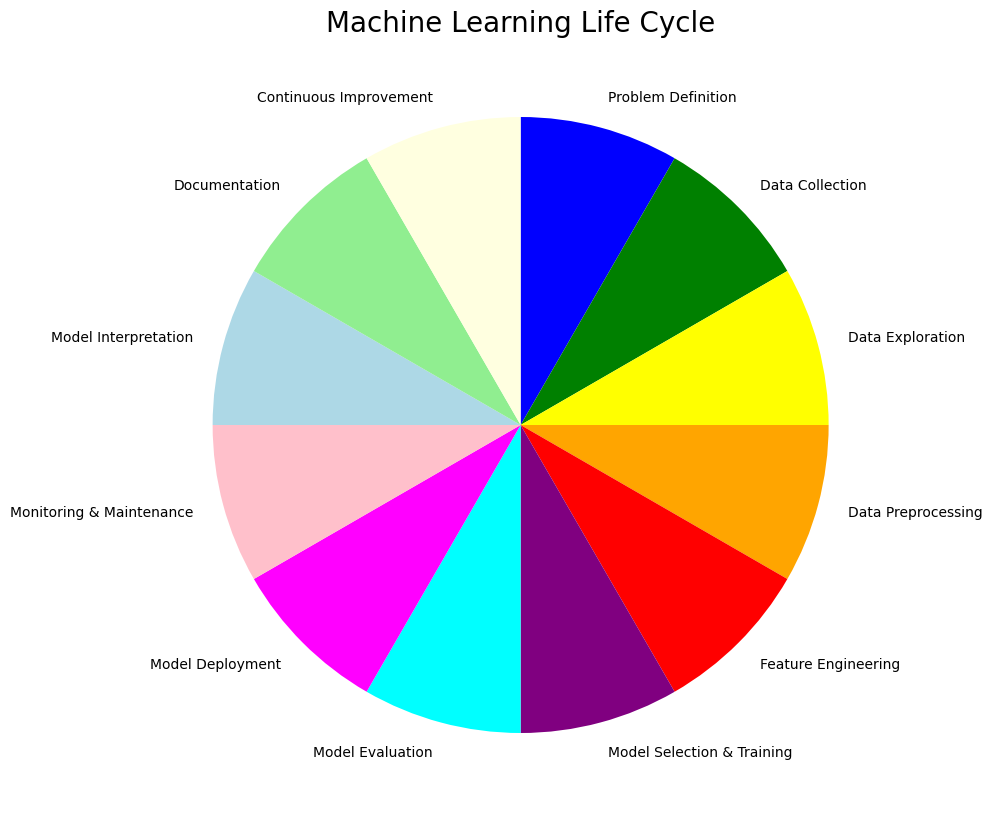